In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneOut
from sklearn import preprocessing as skpp
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn import metrics

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
tx = pd.read_csv('fertility_Diagnosis.txt', header=None)
df=pd.DataFrame(tx.values, columns=['test_season','age','had_chood_disease','had_trauma','had_surgery',
                            'had_fever_lasty', 'alcholo_freq', 'smoking_freq', 'hours_sitting',
                            'target'])

In [12]:
HOMEWORK 2
1. Examine the “Fertility_dataset” data file and
a) What can be done during the data pre-processing stage?
b) What are the faulty and problematic points in dataset?
You need to preprocess the data by determining
2. Fertility dataset
Summary: 100 volunteers provide semen samples analyzed according to WHO
2010 criteria. Sperm concentration is related to socio-demographic data, environmental
factors, health status and living habits.
Feature Information:
Column 1: Season in which the analysis was conducted. 1) winter, 2) spring, 3) summer,
4) autumn. in data
Codes: (-1, -0.33, 0.33, 1)
Column 2: Age at time of analysis. 18-36 (ages standardized between 0 and 1)
Column 3: Childhood diseases (chickenpox, measles, mumps, polio) 1) yes, 2) no. Codes
in Data: (0:yes, 1:no)
Column 4: Accident or serious trauma 1) yes, 2) no. Codes in Data: (0:yes, 1:no) Column
5: Surgical intervention 1) yes, 2) no. Codes in Data: (0:yes, 1:no)
Column 6: High fever in the last year 1) less than three months ago, 2) more than three
months ago, 3) no.
Codes in Data: (-1, 0, 1)
Column 7: Frequency of alcohol use: 1) Several times a day, 2) Every day, 3) Several
times a week, 4) Once a week, 5) Almost never or never (5 groups coded between 0, 1:
0,2, 0.4, 0.6, 0.8, 1)
Column 8: Smoking habit 1)never, 2)sometimes 3)every day. Codes in the Data:
(-1, 0, 1)
Column 9: Number of hours spent sitting per day ene-16 (standardized between 0 and 1)
Column 10: Output: Diagnosis normal (N), modified (A) (1: normal, 2: Modified)
Codes: (1, 2)
Related Paper: Gil, D., Girela, J. L., De Juan, J., Gomez-Torres, M. J., &amp; Johnsson, M.
(2012). Predicting seminal quality with artificial intelligence methods. Expert Systems
with Applications, 39(16), 12564-12573.
https://www.sciencedirect.com/science/article/pii/S0957417412007269
3. Using the Artifial Intelligence methods explained within the scope of the course
(Linear Regresion Analysis, Logistic Regresion Analysis and Support Vector Machine),
Perform analysis and classification operations.

SyntaxError: invalid syntax (1991404812.py, line 1)

1. Season, fever, alcohol and smoking frequency columns should be converted to original categories since it is not correct to use current values as inout to any ML model
2. Yes no columns should be reversed as current values are nt conventional
3. Target should be converted to 0-1


Problematic
1. Incorrect values for categerical columns
2. Already standardized values for contunious columns using whole data which means when we do train-test split we will face some level of data leakage. Since max and min values from original data is not known we can reverse this standardization.
3. Few samples
4. Very few samples for positive class (12)


In [3]:
df.head()

,test_season,age,had_chood_disease,had_trauma,had_surgery,had_fever_lasty,alcholo_freq,smoking_freq,hours_sitting,target
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,-0.33,0.5,1,0,0,0,1.0,-1,0.5,N
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
4,-0.33,0.67,1,1,0,0,0.8,-1,0.5,O


In [4]:
map_season = {-1:'winter', -0.33:'spring', 0.33:'summer', 1:'autumn'}
map_yes_no = {0:1, 1:0}
map_fever = {-1:'less_than_3m', 0: 'more_than_3m', 1: 'no'}
map_alcohol = {0.2:'several_per_day', 0.4: 'once_a_day', 0.6: 'several_per_week', 0.8: 'once_a_week', 1:'almost_never'} 
map_smoking = {-1:'never', 0:'sometimes', 1:'every_day'}
map_target = {'N':0,'O':1}



df['test_season'] = df['test_season'].replace(map_season)
df[['had_chood_disease', 'had_trauma','had_surgery']] = df[['had_chood_disease', 
                                'had_trauma','had_surgery']].replace(map_yes_no)
df['had_fever_lasty'] = df['had_fever_lasty'].replace(map_fever)
df['alcholo_freq'] = df['alcholo_freq'].replace(map_alcohol)
df['smoking_freq'] = df['smoking_freq'].replace(map_smoking)
df['target'] = df['target'].replace(map_target)

In [5]:
df

,test_season,age,had_chood_disease,had_trauma,had_surgery,had_fever_lasty,alcholo_freq,smoking_freq,hours_sitting,target
0,spring,0.69,1,0,0,more_than_3m,once_a_week,sometimes,0.88,0
1,spring,0.94,0,1,0,more_than_3m,once_a_week,every_day,0.31,1
2,spring,0.5,0,1,1,more_than_3m,almost_never,never,0.5,0
3,spring,0.75,1,0,0,more_than_3m,almost_never,never,0.38,0
4,spring,0.67,0,0,1,more_than_3m,once_a_week,never,0.5,1
...,...,...,...,...,...,...,...,...,...,...
95,winter,0.67,0,1,1,more_than_3m,almost_never,never,0.5,0
96,winter,0.61,0,1,1,more_than_3m,once_a_week,sometimes,0.5,0
97,winter,0.67,0,0,0,more_than_3m,almost_never,never,0.31,0
98,winter,0.64,0,1,0,more_than_3m,almost_never,sometimes,0.19,0


In [6]:
df.isna().sum()

test_season          0
age                  0
had_chood_disease    0
had_trauma           0
had_surgery          0
had_fever_lasty      0
alcholo_freq         0
smoking_freq         0
hours_sitting        0
target               0
dtype: int64

In [7]:
# Define columns based on data types
X = df.drop('target', axis=1)
y = df['target']


ohe = skpp.OneHotEncoder(sparse_output=False, drop='if_binary').set_output(transform='pandas')
X_ohe = ohe.fit_transform(X[['test_season', 'had_fever_lasty', 'alcholo_freq', 'smoking_freq']])
X.drop(['test_season', 'had_fever_lasty', 'alcholo_freq', 'smoking_freq'], axis=1, inplace=True)
X = pd.concat([X, X_ohe], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1, stratify=y)

In [8]:
model = LogisticRegression(class_weight='balanced', C=0.01)

model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [9]:
print(metrics.classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.95      0.64      0.77        59
           1       0.22      0.75      0.34         8

    accuracy                           0.66        67
   macro avg       0.59      0.70      0.56        67
weighted avg       0.86      0.66      0.72        67



In [10]:
print(metrics.classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.91      0.69      0.78        29
           1       0.18      0.50      0.27         4

    accuracy                           0.67        33
   macro avg       0.55      0.59      0.53        33
weighted avg       0.82      0.67      0.72        33



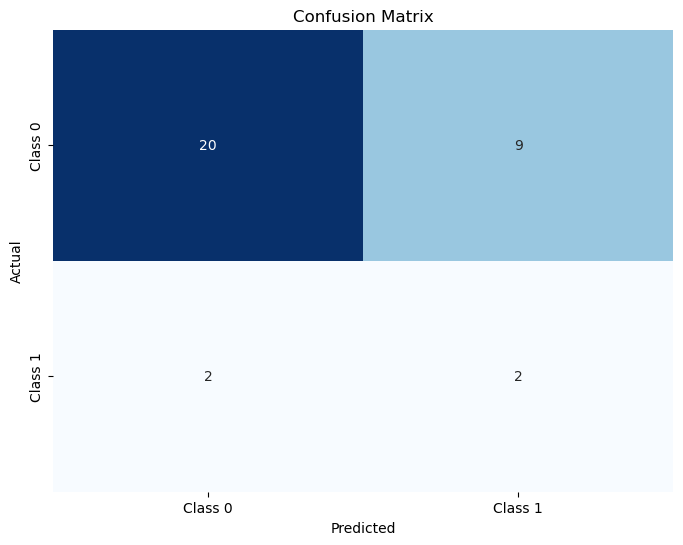

In [11]:
cm = metrics.confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [12]:
svc = SVC(class_weight='balanced', C=0.01)

svc.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [13]:
print(metrics.classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.95      0.64      0.77        59
           1       0.22      0.75      0.34         8

    accuracy                           0.66        67
   macro avg       0.59      0.70      0.56        67
weighted avg       0.86      0.66      0.72        67



In [14]:
print(metrics.classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.91      0.69      0.78        29
           1       0.18      0.50      0.27         4

    accuracy                           0.67        33
   macro avg       0.55      0.59      0.53        33
weighted avg       0.82      0.67      0.72        33



In [15]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=1)

# Apply SMOTE to the training set
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [19]:
svc2 = SVC(class_weight='balanced', C=0.01)

svc2.fit(X_train_resampled, y_train_resampled)
y_pred_train = model.predict(X_train_resampled)
y_pred_test = model.predict(X_test)

In [20]:
print(metrics.classification_report(y_train_resampled, y_pred_train))

              precision    recall  f1-score   support

           0       0.81      0.64      0.72        59
           1       0.70      0.85      0.77        59

    accuracy                           0.75       118
   macro avg       0.76      0.75      0.74       118
weighted avg       0.76      0.75      0.74       118



In [21]:
print(metrics.classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.91      0.69      0.78        29
           1       0.18      0.50      0.27         4

    accuracy                           0.67        33
   macro avg       0.55      0.59      0.53        33
weighted avg       0.82      0.67      0.72        33



Results:

note: add confusion matrix graph to word

For logistic regression and SVC I got same best result when C = 0.01 (penalty parameter). Recall for positive class is 0.5 meaning that it could predict hall of actual patients. Using smote for oversampling did not help resulting in same performance in test set. To get better performance we need larger dataset with additional meaningful features.